<a href="https://colab.research.google.com/github/HariPrabu741/CNN/blob/main/cnn_keras_tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install keras-tuner

     |████████████████████████████████| 96 kB 2.7 MB/s 


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
fashion_minist=keras.datasets.fashion_mnist

In [5]:
(train_image,train_label),(test_image,test_label)=fashion_minist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


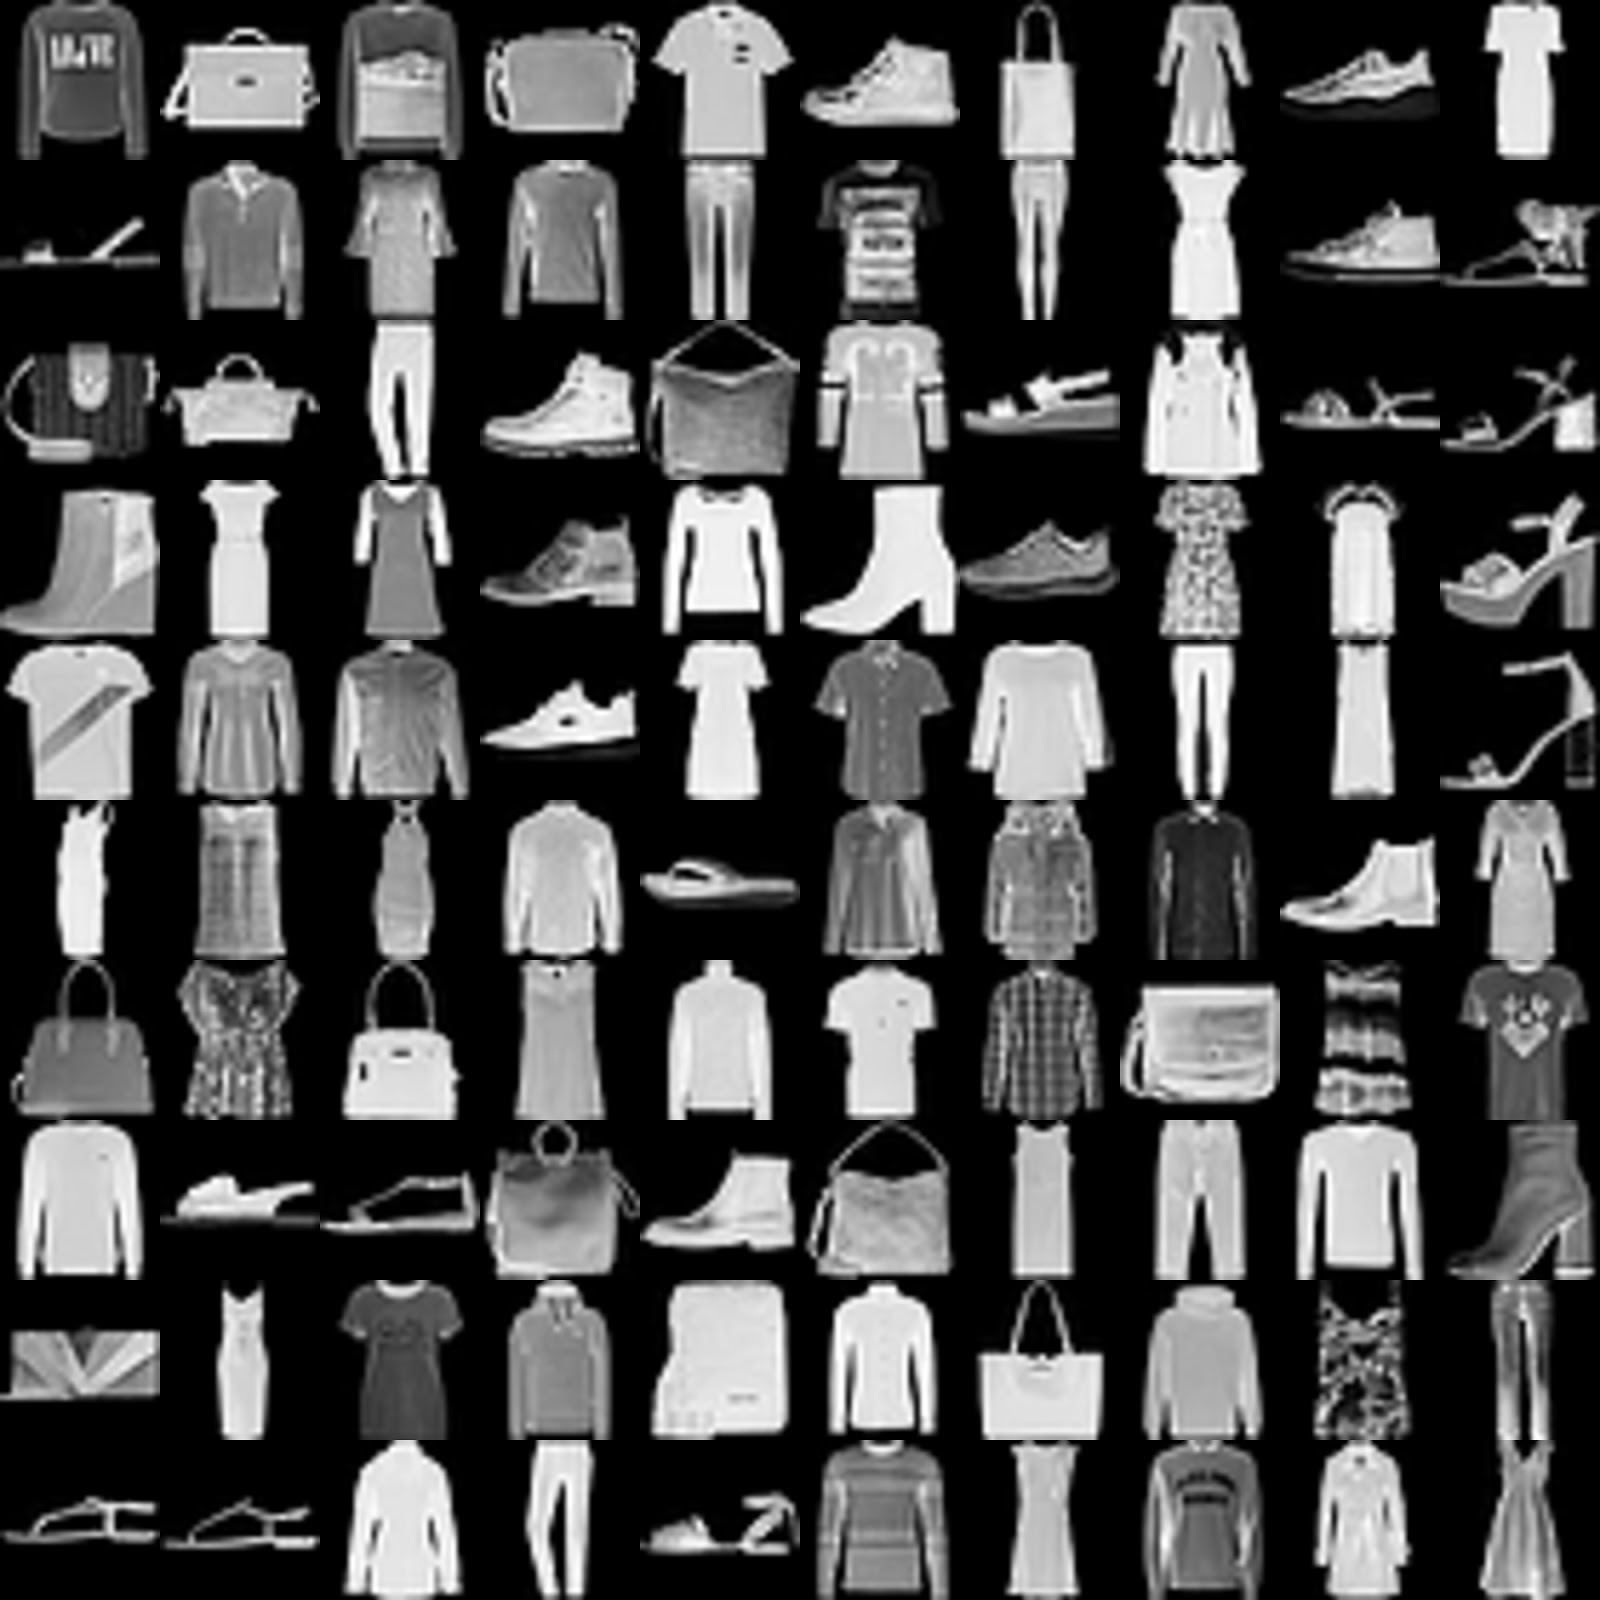

In [12]:
from IPython.display import Image
Image(filename='out.jpg')

In [13]:
# train_image and test_image are in pixels. So scalling it by dividing 255

train_image=train_image/255
test_image=test_image/255

In [15]:
train_image[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [14]:
train_image[0].shape

(28, 28)

In [16]:
len(train_image)

60000

In [17]:
train_image=train_image.reshape(len(train_image),28,28,1)
test_image=test_image.reshape(len(test_image),28,28,1)

In [18]:
train_image.shape

(60000, 28, 28, 1)

In [29]:
def build_model(hp):
  model = keras.Sequential([
                            keras.layers.Conv2D(
                                filters=hp.Int('conv_1 filter', min_value=40, max_value=400, step=40),
                                kernel_size=hp.Choice('conv_1 kernal',values=[3,5]),
                                activation='relu',
                                input_shape=(28,28,1)
                            ),
                            keras.layers.Conv2D(
                                filters=hp.Int('conv_2 filters', min_value=40, max_value=400, step=40),
                                kernel_size=hp.Choice('conv_2 kernal',values=[3,5]),
                                activation='relu'
                            ),
                            keras.layers.Flatten(),
                            keras.layers.Dense(
                                units=hp.Int('dense_1 unit',min_value=40,max_value=400,step=40),
                                activation='relu'
                            ),
                            keras.layers.Dense(10, activation='softmax')
  ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model

In [30]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [31]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,
                          directory='output',
                          project_name='fashion_mnist')

In [33]:
tuner_search.search(train_image,train_label,epochs=3,validation_split=0.1)

Trial 6 Complete [00h 08m 22s]
val_accuracy: 0.9168333411216736

Best val_accuracy So Far: 0.9168333411216736
Total elapsed time: 00h 21m 49s
INFO:tensorflow:Oracle triggered exit


In [36]:
mo=tuner_search.get_best_models(num_models=1)[0]

In [38]:
mo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 360)       3600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 360)       3240360   
_________________________________________________________________
flatten (Flatten)            (None, 174240)            0         
_________________________________________________________________
dense (Dense)                (None, 400)               69696400  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                4010      
Total params: 72,944,370
Trainable params: 72,944,370
Non-trainable params: 0
_________________________________________________________________


In [39]:
mo.fit(train_image,train_label,epochs=10,validation_split=0.1,initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 154s 91ms/step - loss: 0.1031 - accuracy: 0.9613 - val_loss: 0.2709 - val_accuracy: 0.9133
Epoch 5/10
1688/1688 [==============================] - 153s 91ms/step - loss: 0.0671 - accuracy: 0.9760 - val_loss: 0.3529 - val_accuracy: 0.9140
Epoch 6/10
1688/1688 [==============================] - 153s 91ms/step - loss: 0.0438 - accuracy: 0.9843 - val_loss: 0.3959 - val_accuracy: 0.9107
Epoch 7/10
1688/1688 [==============================] - 153s 91ms/step - loss: 0.0338 - accuracy: 0.9883 - val_loss: 0.5009 - val_accuracy: 0.9140
Epoch 8/10
1688/1688 [==============================] - 154s 91ms/step - loss: 0.0279 - accuracy: 0.9900 - val_loss: 0.5623 - val_accuracy: 0.9122
Epoch 9/10
1688/1688 [==============================] - 154s 91ms/step - loss: 0.0219 - accuracy: 0.9925 - val_loss: 0.5830 - val_accuracy: 0.9142
Epoch 10/10
1688/1688 [==============================] - 155s 92ms/step - loss: 0.0247 - accuracy: 0.9923 - val_loss: 